# Implementing EfficientNetB3

In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

2023-07-31 16:52:02.246932: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 16:52:02.299650: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 16:52:02.300937: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 16:52:06.413762: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions

In [3]:
# List of vitamin folders
vitamin_folders = ["Vitamin_A", "Vitamin_B", "Vitamin_C", "Vitamin_E", "Vitamin_K"]

# Set the output base directory in the Colab disk space
preprocess_dir = '../output/resolution_300'

# Training starts from here

In [4]:
image_files = []
labels = []

for folder in vitamin_folders:
    folder_path = os.path.join(preprocess_dir, folder)
    image_files.extend([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.jpg')])
    labels.extend([folder] * len(os.listdir(folder_path)))

# Convert the labels to numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [5]:
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(128, activation='relu')(x)

# Add an output layer with the number of classes
predictions = Dense(len(vitamin_folders), activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split the data into train and test sets
train_files, test_files, train_labels, test_labels = train_test_split(image_files, labels_encoded, test_size=0.2, random_state=42)

# Function to load and preprocess images
def load_image(file_path):
    img = image.load_img(file_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
    return img

# Load and preprocess train images
train_images = np.array([load_image(file) for file in train_files])
train_labels = np.array(train_labels)

# Load and preprocess test images
test_images = np.array([load_image(file) for file in test_files])
test_labels = np.array(test_labels)

In [7]:
model.fit(train_images, train_labels, epochs=10, batch_size=32)

2023-07-31 16:52:44.884990: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1527558144 exceeds 10% of free system memory.


Epoch 1/10


2023-07-31 16:53:19.835043: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64225280 exceeds 10% of free system memory.
2023-07-31 16:53:20.248275: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64225280 exceeds 10% of free system memory.
2023-07-31 16:53:20.282460: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64225280 exceeds 10% of free system memory.
2023-07-31 16:53:20.368181: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64225280 exceeds 10% of free system memory.


80/80 [==============================] - 763s 9s/step - loss: 0.5085 - accuracy: 0.8199
Epoch 2/10
80/80 [==============================] - 732s 9s/step - loss: 0.2173 - accuracy: 0.9330
Epoch 3/10
80/80 [==============================] - 662s 8s/step - loss: 0.1776 - accuracy: 0.9511
Epoch 4/10
80/80 [==============================] - 596s 7s/step - loss: 0.1561 - accuracy: 0.9492
Epoch 5/10
80/80 [==============================] - 705s 9s/step - loss: 0.1023 - accuracy: 0.9712
Epoch 6/10
80/80 [==============================] - 698s 9s/step - loss: 0.0505 - accuracy: 0.9850
Epoch 7/10
80/80 [==============================] - 702s 9s/step - loss: 0.0851 - accuracy: 0.9744
Epoch 8/10
80/80 [==============================] - 674s 8s/step - loss: 0.1094 - accuracy: 0.9700
Epoch 9/10
80/80 [==============================] - 694s 9s/step - loss: 0.1149 - accuracy: 0.9657
Epoch 10/10
80/80 [==============================] - 696s 9s/step - loss: 0.0808 - accuracy: 0.9760


In [8]:
_, accuracy = model.evaluate(test_images, test_labels)
print('Accuracy:', accuracy)

20/20 [==============================] - 52s 2s/step - loss: 0.1192 - accuracy: 0.9543
Accuracy: 0.9543306827545166


In [9]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=vitamin_folders))

print("Confusion Matrix:")
print(confusion_matrix(test_labels, predicted_labels))

20/20 [==============================] - 39s 2s/step
Classification Report:
              precision    recall  f1-score   support

   Vitamin_A       0.97      0.95      0.96       152
   Vitamin_B       0.90      0.98      0.94       150
   Vitamin_C       0.98      0.92      0.95       194
   Vitamin_E       0.98      1.00      0.99        54
   Vitamin_K       0.95      0.98      0.97        85

    accuracy                           0.95       635
   macro avg       0.96      0.96      0.96       635
weighted avg       0.96      0.95      0.95       635

Confusion Matrix:
[[144   3   2   0   3]
 [  0 147   1   1   1]
 [  2  14 178   0   0]
 [  0   0   0  54   0]
 [  2   0   0   0  83]]


In [10]:
# Define the classification_rep variable
classification_rep = classification_report(test_labels, predicted_labels, target_names=vitamin_folders, output_dict=True)

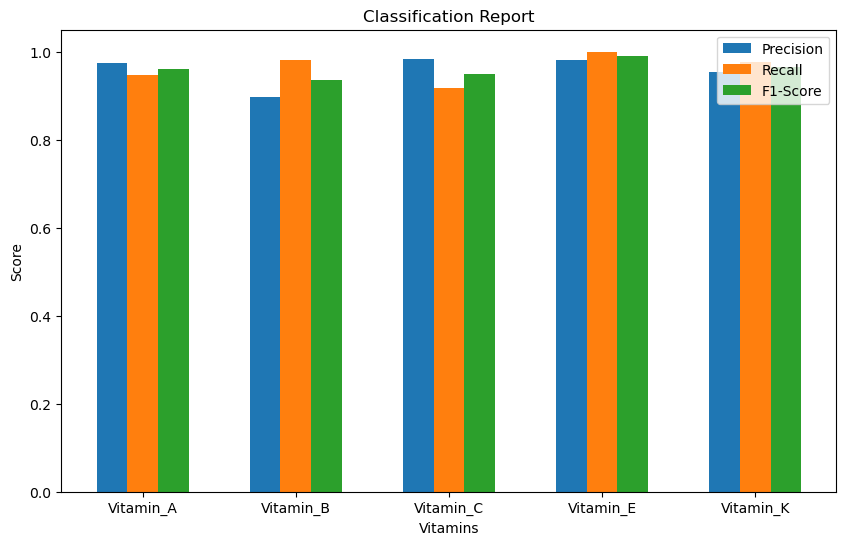

In [11]:
# Create lists for precision, recall, and f1-score
vitamin_names = []
precision_values = []
recall_values = []
f1_score_values = []

# Populate the lists
for folder in vitamin_folders:
    vitamin_names.append(folder)
    precision_values.append(classification_rep[folder]['precision'])
    recall_values.append(classification_rep[folder]['recall'])
    f1_score_values.append(classification_rep[folder]['f1-score'])

# Plot the precision, recall, and f1-score using a bar plot
plt.figure(figsize=(10, 6))
x = np.arange(len(vitamin_names))
width = 0.2

plt.bar(x, precision_values, width, label='Precision')
plt.bar(x + width, recall_values, width, label='Recall')
plt.bar(x + 2 * width, f1_score_values, width, label='F1-Score')

plt.xlabel('Vitamins')
plt.ylabel('Score')
plt.title('Classification Report')
plt.xticks(x + width, vitamin_names)
plt.legend()
plt.show()

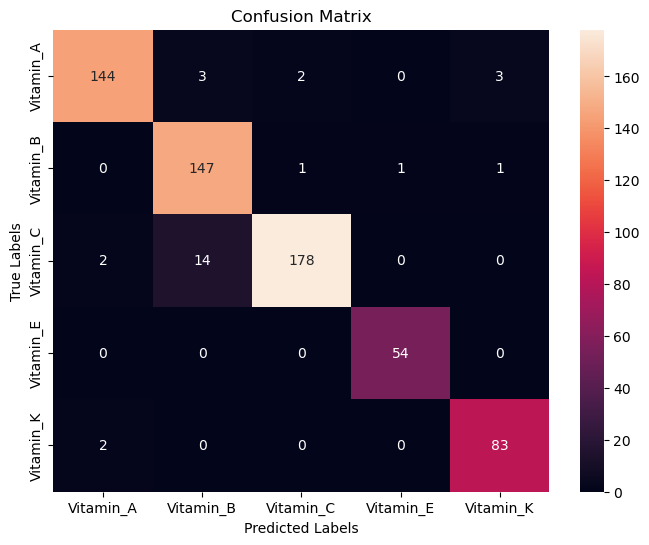

In [12]:
import seaborn as sns

# Create a confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', xticklabels=vitamin_folders, yticklabels=vitamin_folders)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()